### Decision Tree Classifier

1. The main aim of this project is to build an end to end machine learning project by developing and evaluating a complete decision tree classifier based on the Iris Dataset.

2. The model aims to predict the species of an Iris flower (Setosa, Versicolor, or Virginica) based on its sepal and petal measurements.

3. The project covers the complete ML pipeline, including data preprocessing, model training, evaluation, and result interpretation.


### Steps performed by this algorithm:

1. Import all the necessary libraries

2. Load the dataset

3. Explore EDA

4. Divide the dataset into independent and dependent variables

5. Divide the independent and dependent variables into training and testing data

6. Perform the Feature Scaling on the input data

7. Train the Decision Tree Classifier model

8. Predict the model on the test data

9. Evaluate the model performance

10. Plot the Decision Tree Classifier

11. Predict the Iris Species

### Step 1: Import all the necessary libraries

In [1282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets        import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.tree            import DecisionTreeClassifier, plot_tree
from sklearn.metrics         import accuracy_score, confusion_matrix, classification_report

### Step 2: Load the dataset

In [1283]:
data = load_iris()

In [1284]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [1285]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [1286]:
### Cosntruct the dataframe based on the above data

df = pd.DataFrame(data.data, columns = data.feature_names)

In [1287]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [1288]:
### Adding the target to the dataframe

df['target'] = data.target

In [1289]:
### Display the complete DataFrame

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### OBSERVATIONS:

1. The entire dataset is obtained that contains the inputs which has:-

    (a.)  sepal_length

    (b.)  sepal_width

    (c.)  petal_width

    (d.)  petal_length

2. This dataset has an output which has:-

    (a.)   target

### Step 3: Explore EDA

In [1290]:
### Display the total number of records in the Dataframe

print("Total number of records in the dataframe is:", len(df))

Total number of records in the dataframe is: 150


In [1291]:
### Display the top five records of the dataframe

print(df.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]


In [1292]:
### Display the bottom five reocords of the Dataframe

print(df.tail())

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
145                6.7               3.0  ...               2.3       2
146                6.3               2.5  ...               1.9       2
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[5 rows x 5 columns]


In [1293]:
### Rename the columns in the dataframe

df.rename(columns={
           'sepal length (cm)' :   'sepal_length'   ,
           'sepal width (cm)'  :   'sepal_width'    ,
           'petal length (cm)' :   'petal_length'   ,
           'petal width (cm)'  :   'petal_width'}   ,
            inplace=True)

In [1294]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [1295]:
### get the columns used in the DataFrame

df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [1296]:
### get the information about the columns used in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [1297]:
### get the summary statistics about the dataset

df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [1298]:
### Check if there are any NULL Values in the dataframe

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Values in the dataframe.

In [1299]:
### Check for any duplicate records in the dataframe

df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2


### OBSERVATIONS:

1. Ther is only one duplicate record in the dataset, so remove that duplicate record from it.

In [1300]:
df.drop_duplicates(inplace=True)

In [1301]:
### Again check for any duplicate records in the dataframe

df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,target


### OBSERVATIONS:

1.  Now there are no duplicate records in the dataset.

### Step 4: Divide the dataset into independent and dependent variables

In [1302]:
X = df.drop(columns='target', axis=1)

Y = df['target']

In [1303]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[149 rows x 4 columns]


In [1304]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 149, dtype: int64


### Step 5: Divide the independent and dependent variables into training and testing data

In [1305]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [1306]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [1307]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
117,7.7,3.8,6.7,2.2
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
140,6.7,3.1,5.6,2.4
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [1308]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (119, 4)
Shape of the input testing  data is: (30, 4)


In [1309]:
Y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 119, dtype: int64

In [1310]:
Y_test

73     1
18     0
117    2
78     1
76     1
31     0
64     1
140    2
68     1
82     1
109    2
12     0
36     0
9      0
19     0
56     1
136    2
69     1
55     1
131    2
29     0
123    2
26     0
127    2
128    2
145    2
110    2
101    2
45     0
30     0
Name: target, dtype: int64

In [1311]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (119,)
Shape of the output testing  data is: (30,)


### Step 6: Perform the Feature Scaling on the input data

In [1312]:
from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()

### using the object for StandardScaler, scale the inputs

X_train_scaled = sc.fit_transform(X_train)

X_test_Scaled  = sc.transform(X_test)

In [1313]:
X_train_scaled

array([[-1.47286067,  1.25077879, -1.55015743, -1.30727768],
       [-0.14230538,  3.0604162 , -1.26565907, -1.03952201],
       [ 1.06729034,  0.11975542,  0.38443139,  0.29925634],
       [-1.23094153,  0.79836944, -1.2087594 , -1.30727768],
       [-1.71477982,  0.34596009, -1.37945841, -1.30727768],
       [ 2.15592649, -0.10644926,  1.63622416,  1.23640118],
       [ 0.70441163,  0.34596009,  0.44133106,  0.43313417],
       [-0.74710324,  1.02457412, -1.26565907, -1.30727768],
       [-0.98902238,  1.25077879, -1.32255874, -1.30727768],
       [-0.74710324,  2.38180217, -1.26565907, -1.44115551],
       [ 1.30920949,  0.34596009,  1.12412712,  1.50415685],
       [ 0.22057334,  0.79836944,  0.44133106,  0.567012  ],
       [ 1.06729034,  0.11975542,  0.55513041,  0.43313417],
       [-0.5051841 ,  1.92939282, -1.37945841, -1.03952201],
       [-0.5051841 ,  1.47698347, -1.26565907, -1.30727768],
       [-0.38422452, -1.46367731, -0.01386631, -0.236255  ],
       [ 0.70441163, -0.

In [1314]:
X_test_Scaled

array([[ 0.34153291, -0.55885861,  0.55513041,  0.03150067],
       [-0.14230538,  1.70318815, -1.15185973, -1.17339984],
       [ 2.27688606,  1.70318815,  1.69312383,  1.37027901],
       [ 0.22057334, -0.33265393,  0.44133106,  0.43313417],
       [ 1.18824991, -0.55885861,  0.61203008,  0.29925634],
       [-0.5051841 ,  0.79836944, -1.26565907, -1.03952201],
       [-0.26326495, -0.33265393, -0.07076598,  0.1653785 ],
       [ 1.06729034,  0.11975542,  1.06722745,  1.63803468],
       [ 0.46249248, -1.91608666,  0.44133106,  0.43313417],
       [-0.02134581, -0.78506329,  0.09993304,  0.03150067],
       [ 1.6720882 ,  1.25077879,  1.3517258 ,  1.77191252],
       [-1.23094153, -0.10644926, -1.32255874, -1.44115551],
       [-0.38422452,  1.02457412, -1.37945841, -1.30727768],
       [-1.10998196,  0.11975542, -1.26565907, -1.44115551],
       [-0.86806281,  1.70318815, -1.26565907, -1.17339984],
       [ 0.58345205,  0.57216477,  0.55513041,  0.567012  ],
       [ 0.58345205,  0.

### OBSERVATIONS:

1. All the inputs has been scaled in one range. Now the model is completely ready for the training purpose.

### Step 7: Train the Decision Tree Classifier model

In [1315]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dectree = DecisionTreeClassifier(criterion='entropy', random_state=42)

### using the object train the model

dectree.fit(X_train_scaled, Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### OBSERVATIONS:

1. The decision tree classifier has been trained with the help of the training data using the following parameters:-

   (a.)    criterion ---------> entropy (Entropy based classifier is used)

   (b.)    min_samples_split ----> Minimum number of samples needed for splitting.

   (c.)    min_samples_leaf -----> Minimum number of leaf nodes is 1.

### Step 8: Predict the model on the test data

In [1316]:
Y_pred = dectree.predict(X_test_Scaled)

print(Y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0]


In [1317]:
Y_test.ndim

1

In [1318]:
Y_pred.ndim

1

In [1319]:
df_compare = pd.DataFrame({
    "Y_test": Y_test                ,
    "Y_pred": Y_pred                                      
})

In [1320]:
df_compare

,Y_test,Y_pred
73,1,1
18,0,0
117,2,2
78,1,1
76,1,1
31,0,0
64,1,1
140,2,2
68,1,1
82,1,1


### Step 9: Evaluate the model performance


In [1321]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(Y_test, Y_pred)

print("Accuracy of the model is:", (ac*100.0))

Accuracy of the model is: 96.66666666666667


In [1322]:
cm = confusion_matrix(Y_test, Y_pred)

print("Confusion matrix of the model is:", cm)

Confusion matrix of the model is: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [1323]:
cr = classification_report(Y_test, Y_pred)

print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Step 10:  Plot the Decision Tree Classifier

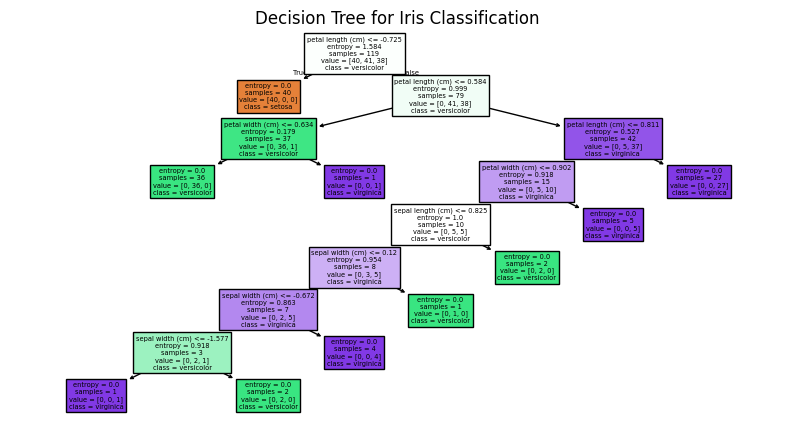

In [1324]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,5))

plot_tree(dectree, filled=True,feature_names=data.feature_names, class_names= data.target_names)

plt.title("Decision Tree for Iris Classification")
plt.show()

### OBSERVATION

1. A decision tree classifier model is built.

### Step 11: Predict the Iris Species

In [1325]:
new_samples = np.array([[5.1, 3.5, 1.4, 0.2]])  

predictions = dectree.predict(new_samples)

print(predictions)

[2]


In [1326]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [1327]:
if(predictions[0] == 0):
      print("setosa")
elif(predictions[0] == 1):
    print("versicolor")
else:
    print("virginica")

virginica
